# Homework 10

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date:** Sunday, November 18th, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

### Collaborators

** Place the name of everyone who's submitting this assignment here**

<div class="answer-separator">
------------------------
</div>

In [1]:
import numpy as np
import scipy.stats
import scipy.special
import random

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm

import pandas as pd
import seaborn as sns

%matplotlib inline

## Question 1: Metropoflix and Chill (What's your Net Worth)?

**coding required**

Suppose we ask you to memorize the order of the top five movies on IMDB. When we quiz you on the order afterwards, you may not recall the correct order, but the mistakes you make in your recall can be modeled by simple probabilistic models.
  
Let's say that the top five movies are:  
1. *The Shawshank Redemption*
2. *The Godfather*
3. *The Godfather: Part II*
4. *Black Panther*
5. *Pulp Fiction*

Let's represent this ordering by the vector $\omega = (1,2,3,4,5)$. 

If you were to mistakenly recall the top five movies as:
2. *The Godfather*
3. *The Godfather: Part II*
5. *Pulp Fiction*
4. *Black Panther*
1. *The Shawshank Redemption*

We'd represent your answer by the vector $\theta = (2,3,5,4,1)$.

Unfortunately, your answer is wrong.  Fortunately (for our purposes) we have a way of quantifying just how wrong. Define the Hamming distance between two top five rankings, $\theta, \omega$, as follows:
$$d(\theta, \omega) = \sum_{i=1}^5 \mathbb{I}_{\theta_i\neq \omega_i},$$ 
where $\mathbb{I}_{\theta_i\neq \omega_i}$ is an indicator function that returns 1 if $\theta_i\neq \omega_i$, and 0 otherwise.

For example, the Hamming distance between your answer and the correct answer is $d(\theta, \omega)=4$, because you only ranked *Black Panther* correctly. 

Finally, let's suppose that the probability of giving a particular answer (expressed as $\theta$) is modeled as
$$ p(\theta \,|\, \omega, \lambda) \propto  e^{-\lambda\, d(\theta,\, \omega)}$$
where $\lambda$ can be thought of as an inverse temperature

1.1. Implement a Metropolis sampler to produce sample guesses from 500 individuals, with the $\lambda$ values, $\lambda=0.2, 0.5, 1.0$. What are the top five possible guesses?

1.2. Compute the probability that *The Shawshank Redemption* is ranked as the top movie (ranked number 1) by the Metropolis algorithm sampler. Compare the resulting probabilities for the various $\lambda$ values. 

1.3. How does $\lambda$ affect the probability that *The Shawshank Redemption* is ranked as the top movie?


**Gratuitous Titular Reference**:  

It's 2018 -- Even Wikipedia knows what [Netflix and Chill](https://en.wikipedia.org/wiki/Netflix_and_chill) is about. (mixtape by Grime MC Merky ACE].  

[Drake's the type of dude](https://knowyourmeme.com/memes/drake-the-type-of) to not care about [netflix and chill but about that net net net worth](https://youtu.be/DRS_PpOrUZ4?t=224) 

Drake may wanna know if [Kiki/KB](https://www.thefader.com/2018/10/24/real-kiki-drake-in-my-feelings-interview-kyanna-barber) is feeling him, but the [NTSB](https://www.ntsb.gov)  [definitely isn't](https://www.cnn.com/2018/07/25/entertainment/ntsb-in-my-feelings/index.html)

Shout out [Nawlins](https://riverbeats.life/neworleans/drake-shares-his-in-my-feelings) and [Atlanta](http://www.thefader.com/2018/06/29/drake-sampled-atlanta-scorpion).

### 1.1 - Metropolis Sampler
As our "proposal" distribution, we'll randomly swap two indices. This indicates a "step"

In [3]:
def p_scores(theta, lam, w = np.array([1,2,3,4,5])):
    distance = np.sum(theta != w)
    return np.exp(-lam*distance)

# we need to take a "step" but stay in our probability space. So we'll swap two random indices. This is symmetric
# because any two indices are equally likely to swap, and it satisfies detail balance because we can move backwards
def qdraw(x_old):
    
    swaps = np.random.choice([0,1,2,3,4], size = 2, replace = False)
    i, j = swaps
    x_new = list(x_old)
    x_new[i], x_new[j] = x_old[j], x_old[i]

    return x_new

In [4]:
def metropolis(p, qdraw, nsamp, xinit, lam):
    samples=np.empty([nsamp,5])
    x_prev = xinit
    accepted=0
    for i in range(nsamp):
        
        x_star = qdraw(x_prev)
        p_star = p(x_star, lam)
        p_prev = p(x_prev, lam)
        pdfratio = p_star/p_prev
        
        if np.random.uniform() < min(1, pdfratio):
            samples[i] = x_star
            x_prev = x_star
            accepted +=1

        else:#we always get a sample
            samples[i]= x_prev
            
    return samples, accepted

In [5]:
lam_dict = {}

theta_init = [1,2,3,4,5]
np.random.shuffle(theta_init)
print('The initial condition of theta is {}'.format(theta_init))
for lam in [0.2, 0.5, 1]:
    samples, accepted = metropolis(p_scores, qdraw, 500, theta_init, lam)
    labels, counts = np.unique(samples, axis = 0, return_counts = True)
    labels, counts = [str(list(label)) for label in labels], [int(count) for count in counts]
    count_dict = dict(zip(labels, counts))
    lam_dict[lam] = count_dict
    
    print('The top guesses for lambda = {} are...'.format(lam))
    print(sorted(lam_dict[lam], key=lam_dict[lam].get, reverse = True)[:5])
    print('===================================')

The initial condition of theta is [1, 4, 3, 2, 5]
The top guesses for lambda = 0.2 are...
['[2.0, 1.0, 3.0, 4.0, 5.0]', '[1.0, 2.0, 3.0, 4.0, 5.0]', '[5.0, 3.0, 4.0, 1.0, 2.0]', '[1.0, 3.0, 5.0, 4.0, 2.0]', '[5.0, 2.0, 3.0, 4.0, 1.0]']
The top guesses for lambda = 0.5 are...
['[1.0, 2.0, 3.0, 4.0, 5.0]', '[4.0, 2.0, 3.0, 1.0, 5.0]', '[2.0, 1.0, 3.0, 4.0, 5.0]', '[1.0, 4.0, 3.0, 2.0, 5.0]', '[1.0, 5.0, 2.0, 4.0, 3.0]']
The top guesses for lambda = 1 are...
['[1.0, 2.0, 3.0, 4.0, 5.0]', '[2.0, 1.0, 3.0, 4.0, 5.0]', '[1.0, 2.0, 5.0, 4.0, 3.0]', '[1.0, 2.0, 4.0, 3.0, 5.0]', '[5.0, 2.0, 3.0, 4.0, 1.0]']


We can see that $\lambda$ = 0.2 usually does not come up with the correct ordering. This is often true even if our initial condition is the correct guess itself! This model is a little bit too wobbly - there is not a significant cost to changing orderings, so it is unlikely to take a huge number of samples at the correct ordering.

### 1.2 - P(Shawshank is 1)

We can simply check to see among which samples is Shawshank #1

In [6]:
for lam in [0.2, 0.5, 1]:
    samples, accepted = metropolis(p_scores, qdraw, 5000, theta_init, lam)
    shawshank_prob = np.sum([1 for sample in samples if sample[0] == 1])/len(samples)
    print('The probability that Shawshank is #1 for lambda = {} is {}'.format(lam, shawshank_prob))

The probability that Shawshank is #1 for lambda = 0.2 is 0.2548
The probability that Shawshank is #1 for lambda = 0.5 is 0.3444
The probability that Shawshank is #1 for lambda = 1 is 0.5458


### 1.3 - Effect of $\lambda$

Higher $\lambda$'s tend to lead to a more restricted Metropolis sampler. This is because the $\lambda$ term is related to the "cost" of being wrong. When $\lambda$ is low, proposed steps away from the "optimal guess" are not that costly, and the sampler can afford to make them. When $\lambda$ is high, steps that decrease in probability are extremely costly, so the sampler tends to not make them. As an example, if we make $\lambda$ = 10, we get the following results.

In [7]:
samples, accepted = metropolis(p_scores, qdraw, 5000, theta_init, 10)
shawshank_prob = np.sum([1 for sample in samples if sample[0] == 1])/len(samples)
print('The probability that Shawshank is #1 for lambda = {} is {}'.format(10, shawshank_prob))

The probability that Shawshank is #1 for lambda = 10 is 1.0


Of course, while Shawshank is supposed to be at the top spot, we expect more variation than that. Too high of a $\lambda$ leads to a sampler that is too restricted.

<div class="answer-separator">
------------------------
</div>

## Question 2: In a Flash the Iris devient un Fleur-de-Lis.

**coding required**

We've done classification before, but the goal of this problem is to introduce you to the idea of classification using Bayesian inference. 

Consider the famous *Fisher flower Iris data set* a  multivariate data set introduced by Sir Ronald Fisher (1936) as an example of discriminant analysis. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, you will build a model to predict the species. 

For this problem only consider two classes: **virginica** and **not-virginica**. 

The iris data can be obtained [here](https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlo4e4ari3r4wd%2Fj9vjyzv62x149%2Fjoe90cwt3dla%2Firis.csv).

Let $(X, Y )$ be our dataset, where $X=\{\vec{x}_1, \ldots \vec{x}_n\}$ and $\vec{x}_i$ is the standard feature vector corresponding to an offset 1 and the four components explained above. $Y \in \{0,1\}$ are the scalar labels of a class. In other words the species labels are your $Y$ data (virginica = 0 and virginica=1), and the four features -- petal length, petal width, sepal length and sepal width -- along with the offset make up your $X$ data. 

The goal is to train a classifier, that will predict an unknown class label $\hat{y}$ from a new data point $x$. 

Consider the following glm (logistic model) for the probability of a class:

$$ p(y) = \frac{1}{1+e^{-x^T \beta}} $$

(or $logit(p) = x^T \beta$ in more traditional glm form)

where $\beta$ is a 5D parameter to learn. 

Then given $p$ at a particular data point $x$, we can use a bernoulli likelihood to get 1's and 0's. This should be enough for you to set up your model in pymc3. (Note: You might want to set up $p$ as a deterministic explicitly so that pymc3 does the work of giving you the trace).


2.1. Use a 60-40 stratified (preserving class membership) split of the dataset into a training set and a test set. (Feel free to take advantage of scikit-learn's `train_test_split`).

2.2. Choose a prior for $\beta \sim N(0, \sigma^2 I) $ and write down the formula for the posterior $p(\beta| Y,X)$. Since we dont care about regularization here, just use the mostly uninformative value $\sigma = 10$.

2.3. Find the MAP for the posterior on the training set.

2.4. Implement a PyMC3 model to sample from this posterior of $\beta$.  

2.5. Generate 5000 samples of $\beta$.  Visualize the betas and generate a traceplot and autocorrelation plots for each beta component.

2.6. Based on your samples construct an estimate for the posterior mean.

2.7. Select at least 2 datapoints and visualize a histogram of the posterior probabilities.  Denote the posterior mean and MAP on your plot for each datapoint


Although having the posterior probabilities is nice, they are not enough.  We need to think about how to make predictions based on our machinery.  If we define the following:

 - $p_{MEAN}$: using the posterior mean betas to generate probabilities for each data point
 - $p_{MAP}$: using the posterior MAP betas to generate probabilities for each data point
 - $p_{CDF}$: using the fraction of your posterior samples have values above 0.5 for each data point
 - $p_{PP}$:  using the fraction of 1s out of the samples drawn from the posterior predictive distribution for each data point

2.8. Plot the distributions of $p_{MEAN}$, $p_{CDF}$, $p_{MAP}$ and $p_{PP}$ over all the data points in the training set. How are these different?


How do we turn these probabilities into predictions?  *There are two ways to make these predictions, given an estimate of $p(y=1\ \vert\ x)$:* 

- Sample from the Bernoulli likelihood at the data point $x$ to decide if that particular data points classification $y(x)$ should be a 1 or a 0.

- Do the intuitive "machine-learning-decision-theoretic" (MLDT) thing and you assign a data  point $x$ a classification 1 if $p(y=1 \vert x) > 0.5$.

2.9. Plot the posterior-predictive distribution of the misclassification rate with respect to the true class identities $y(x)$ of the data points $x$ (in other words you are plotting a histogram with the misclassification rate for the $n_{trace}$ posterior-predictive samples) on the training set.

2.10. For every posterior sample, consider whether the data point ought to be classified as a 1 or 0 from the $p>0.5 \implies y=1$ decision theoretic prespective. Using the MLDT defined above, overlay a plot of the histogram of the misclassification rate for the posterior on the corresponding plot for the posterior-predictive you constructed in 2.9.  Which case (from posterior-predictive or from-posterior) has a wider mis-classification distribution? 

2.11. Repeat 2.9 and 2.10 for the test set (i.e. make predictions).  Describe and interpret the widths of the resulting distributions.

**Gratuitous Titular References**:  

[The Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) was introduced by Ronald Fisher as part of a [famous article](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x) introducing [LDA](https://en.wikipedia.org/wiki/Linear_discriminant_analysis).

The three iris variants in the dataset were at the time [difficult to tell apart morphologically](https://www.jstor.org/stable/2394164?seq=1#page_scan_tab_contents)

While the origin of the [Fleur-de-Lis is debated](https://www.heraldica.org/topics/fdl.htm), it is most likely an [Iris florentina](https://en.wikipedia.org/wiki/Iris_florentina) or [Iris pseudacorus](https://en.wikipedia.org/wiki/Iris_pseudacorus) but not a [lily flower](https://www.collinsdictionary.com/dictionary/english-french/lily).

[Iris West](https://en.wikipedia.org/wiki/Iris_West) is a love interest of [Barry Allen](https://en.wikipedia.org/wiki/Flash_(Barry_Allen) one of the main incarnations of [The Flash](https://en.wikipedia.org/wiki/Flash_(comics).  Coming from [Central City](https://en.wikipedia.org/wiki/Central_City_(DC_Comics) she is most likely classified as **not-virginica**.

### 2.1 - Train/Test Split

In [8]:
from sklearn.model_selection import train_test_split
iris = pd.read_csv('iris.csv')
iris.insert(4, 'const',1)
labels = [1 if class_label == ' Iris-virginica' else 0 for class_label in iris['class']]
iris['class'] = labels

In [9]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'const']]
y = iris['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, stratify = y)

### 2.2 - Posterior of $\beta$

The posterior of $\beta$ is proportional to the prior times the likelihood. The prior is a multivariate normal, while the likelihood is a logit function. Simply combining these yields

$$P(\beta|Y, X) \propto P(Y|\beta, X) \cdot P(\beta)$$

$$P(\beta|Y, X) \propto \prod_{i = 1}^{150} \frac{1}{1+e^{-x_i^T \beta}} \cdot \frac{\exp\big(\frac{-|\beta|^2}{200}\big)}{\sqrt{(200 \pi)^5}}$$

This is, of course, quite the mess. It'll be much easier to sample from it using pymc3 than some other more analytical method.

### 2.3 - Pymc3 and the MAP estimate

Now we'll use pymc3 to sample from this distribution. 

In [10]:
# pymc3 and theano imports

import pymc3 as pm
from pymc3 import Normal, Binomial, sample, Model 
from pymc3.math import sigmoid
from theano import shared

x_shared = shared(np.array(X_train))
y_shared = shared(np.array(y_train))

In [11]:
with Model() as iris_model:
    
    beta = pm.Normal('beta', 0, tau = 1/100, shape = 5)
    p = pm.math.invlogit(pm.math.dot(x_shared, beta))
    
    y = pm.Bernoulli('y', p = p, observed = y_shared)


In [12]:
beta_map = pm.find_MAP(model = iris_model)
beta_map

logp = -22.372, ||grad|| = 0.026272: 100%|██████████| 38/38 [00:00<00:00, 2281.05it/s]  


{'beta': array([ -1.7294242 ,  -3.55656298,   3.71698652,   8.68148232,
        -11.44314094])}

### 2.4 - Define pymc3 model

See above

### 2.5 - Drawing posteriors for beta

We simply draw posteriors using pm.sample. To avoid divergences, we're using a pretty high acceptance rate (and using thinning to ensure independent samples). 

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]
Sampling 4 chains: 100%|██████████| 42000/42000 [03:16<00:00, 214.11draws/s]
The number of effective samples is smaller than 25% for some parameters.
/Users/jettcrowdis/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


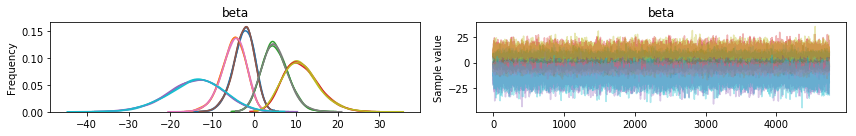

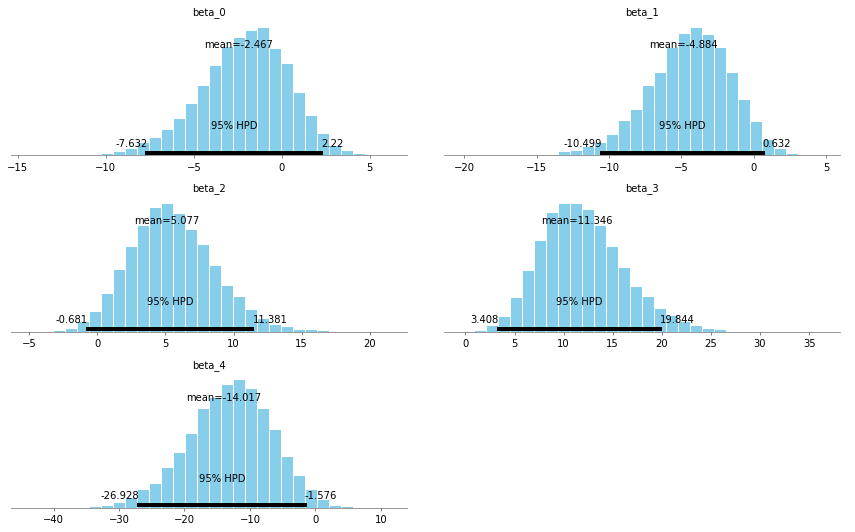

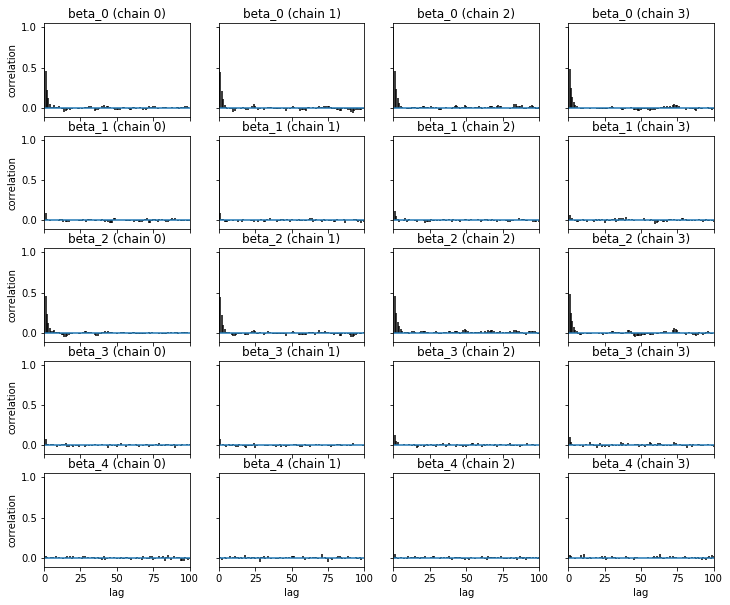

In [13]:
with iris_model:
    step = pm.NUTS(scaling = beta_map, target_accept = 0.95)
    beta_trace = pm.sample(10000, step = step, start = beta_map)
    
temp = beta_trace[500::2]

pm.traceplot(temp);

pm.plot_posterior(temp);

pm.summary(beta_trace)
plt1 = pm.autocorrplot(temp)

### 2.6 Posterior $\beta$ Means
To find the posterior means, we just take the mean of the posterior

In [14]:
temp = beta_trace[500:]
stats = pm.stats.summary(temp)
posterior_means = stats['mean']
print(posterior_means)
stats

beta__0    -2.467752
beta__1    -4.890748
beta__2     5.079732
beta__3    11.326832
beta__4   -13.975501
Name: mean, dtype: float64


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
beta__0,-2.467752,2.527234,0.028322,-7.688634,2.193576,7025.356672,1.000003
beta__1,-4.890748,2.868644,0.021040,-10.471684,0.670714,19923.078776,0.999997
beta__2,5.079732,3.123521,0.034937,-0.745300,11.342722,6864.608583,0.999962
beta__3,11.326832,4.264033,0.032492,3.514589,19.966277,20505.578894,0.999970
beta__4,-13.975501,6.530417,0.040591,-26.948295,-1.555970,29455.567550,0.999973


### 2.7 - Posterior probabilities

To find the posterior probabilities, we simply pass the posterior $\beta$'s back through our likelihood machinery. Pymc3 confusingly gives us back 40k when we asked for 10k samples - this is because it runs 4 different MCMC chains and gives them all back.

In [32]:
print(beta_map['beta']
print(beta_postmean)

array([ -2.48320627,  -4.87373186,   5.09427802,  11.35010267,
       -14.04018112])

In [15]:
beta_samples = beta_trace['beta'][0:10000:2]
beta_postmean = np.mean(beta_samples, axis = 0)

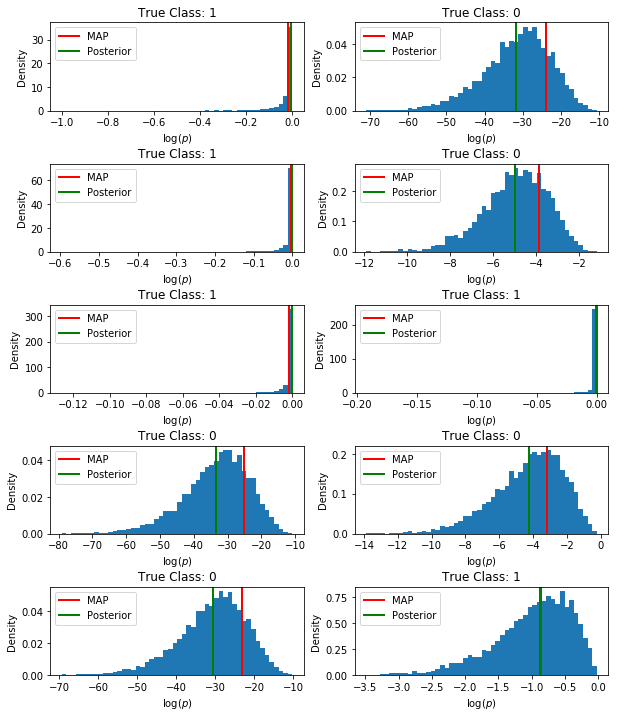

In [28]:
def sigmoid(x):
    return 1/(1 + np.exp(-1*x))

posterior_probs = sigmoid(np.dot(X_train, beta_samples.T))

random_indices = np.random.choice(list(range(90)), size = 10, replace = False)
fig, ax = plt.subplots(5,2, figsize = (10, 12))
plt.subplots_adjust(hspace = 0.6)

for i in range(10):
    j = i % 2
    k = i % 5
    
    idx = random_indices[i]
    beta_map_p = sigmoid(np.dot(X_train.iloc[idx], beta_map['beta']))
    beta_post_p = sigmoid(np.dot(X_train.iloc[idx], beta_postmean))
    
    class_num = y_train.iloc[idx]
    posteriors = posterior_probs[idx,:]
    
    ax[k,j].hist(np.log(posteriors), bins = 50, density = True)
    ax[k,j].axvline(np.log(beta_map_p), linewidth = 2, color = 'red')
    ax[k,j].axvline(np.log(beta_post_p), linewidth = 2, color = 'green')
    ax[k,j].legend(labels = ['MAP', 'Posterior'])
    
    ax[k,j].set_title('True Class: {}'.format(str(class_num)))
    ax[k,j].set_ylabel('Density')
    ax[k,j].set_xlabel(r'$\log(p)$')
    plt.tight_layout


We can see that the MAP and posterior mean estimate are generally pretty close, except in a few examples (those samples without a lot of certainty around their class). The probability predicted by these methods can differ by as much as 8% for these more uncertain observations.

### 2.8. Plot the distributions of $p_{MEAN}$, $p_{CDF}$, $p_{MAP}$ and $p_{PP}$ over all the data points in the training set. How are these different?

To find $p_{PP}$, we just pass our posterior probabilities through a bernoulli. 

For most points, these esimates are fairly close (ie if one estimate has a point at $p(y) = 0.999$, other estimates will be very close to this too). So we chose to visualize these estimates in the range of observations where it is not entirely clear what class they belong to. We chose to order the points by their MAP estimate, so in the below graph, the map estimate is always increasing.

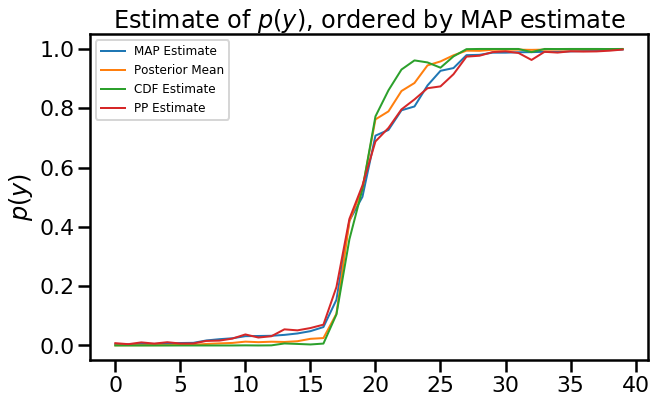

In [36]:
p_map = sigmoid(np.dot(X_train, beta_map['beta']))
p_mean = sigmoid(np.dot(X_train, beta_postmean))
p_cdf = np.sum(posterior_probs > 0.5, axis = 1)/posterior_probs.shape[1]

bernoulli = np.random.uniform(0,1, size = (90, 5000))
posterior_pred = bernoulli < posterior_probs
p_pp = np.sum(posterior_pred, axis = 1)/posterior_probs.shape[1]

with sns.plotting_context('poster'): 
    fig, ax = plt.subplots(1,1, figsize = (10,6))
    pos_idx = np.argsort(p_map)
    plt.plot(p_map[pos_idx][40:80], linewidth = 2, label = 'MAP Estimate')
    plt.plot(p_mean[pos_idx][40:80], linewidth = 2, label = 'Posterior Mean')
    plt.plot(p_cdf[pos_idx][40:80], linewidth = 2, label = 'CDF Estimate')
    plt.plot(p_pp[pos_idx][40:80], linewidth = 2, label = 'PP Estimate')
    plt.ylabel(r'$p(y)$')
    plt.legend(fontsize = 12)
    plt.title(r'Estimate of $p(y)$, ordered by MAP estimate')

We gather the following observations from this graph: 
    1. The CDF Estimate is the one with the most "certainty". That is to say, fewer points have probabilities in between 0.1 and 0.9 for the CDF estimate.
    2. The PP estimate is the one with the least "certainty". This means that more points have probabilities in between 0.1 and 0.9 for the PP estimate. This is a result of essentially passing the posterior probabilities through our likelihood, resulting in greater uncertainty.
    3. The MAP estimate and Posterior mean estimate are close, but the posterior mean estimate tends to be a little more certain.
    
In any case, it's clear that the metrics you choose to estimate $p(y)$ matter, especially for points that are more uncertain (which are, unfortunately, often the ones we care about the most).

As an aside, here are the actual histograms (it should be clear why we chose the above method - it's very difficult to tell these apart).

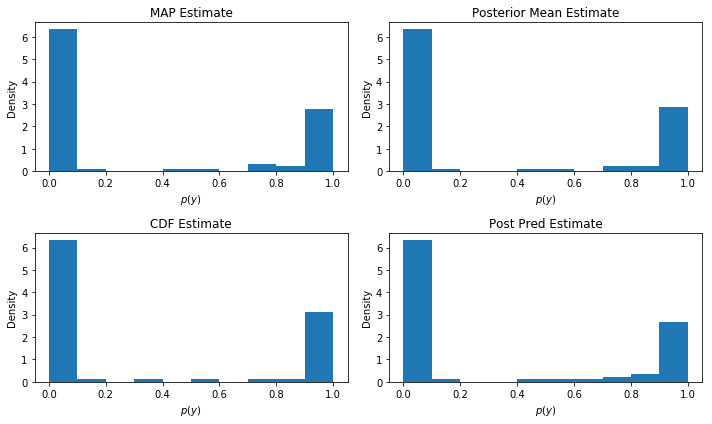

In [37]:
fig, ax = plt.subplots(2,2, figsize = (10,6))
indices = [[0,0], [0,1], [1,0], [1,1]]
p_est = [p_map, p_mean, p_cdf, p_pp]
labels = ['MAP Estimate', 'Posterior Mean Estimate', 'CDF Estimate', 'Post Pred Estimate']
for index, p, label in zip(indices, p_est, labels):
    
    i,j = index
    ax[i,j].hist(p, density = True)
    ax[i,j].set_xlabel(r'$p(y)$')
    ax[i,j].set_ylabel('Density')
    ax[i,j].set_title(label)
    
plt.tight_layout()

 ### 2.9. Plot the posterior-predictive distribution of the misclassification rate with respect to the true class identities  y(x)  of the data points  x  (in other words you are plotting a histogram with the misclassification rate for the  ntrace  posterior-predictive samples) on the training set.

To do this, we'll use the posterior predictive after passing through the Bernoulli likelihood. For each posterior beta, we'll have 90 p's - leading to a misclassification rate for that posterior. We do this for all 5000 posteriors.

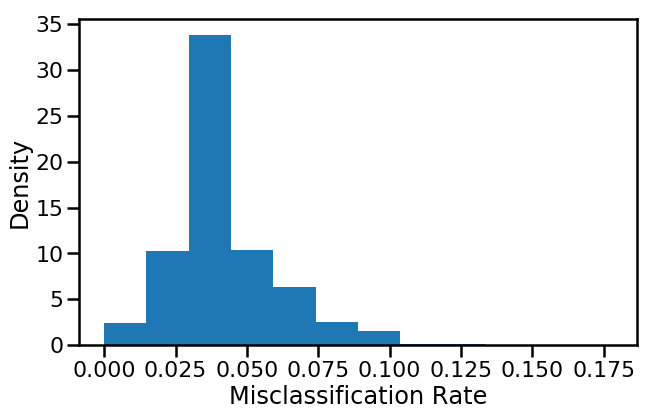

In [38]:
miss_rates = []

for i in range(5000):

    data = posterior_pred[:,i]

    miss_rates.append(1 - np.sum(data == np.array(y_train))/90)

with sns.plotting_context('poster'):
    fig, ax = plt.subplots(1,1, figsize = (10,6))
    plt.hist(miss_rates, bins = 12, density = True)
    plt.xlabel('Misclassification Rate')
    plt.ylabel('Density')

In general, the misclassifications tend to be relatively rare. 

### 2.10. For every posterior sample, consider whether the data point ought to be classified as a 1 or 0 from the  p>0.5⟹y=1  decision theoretic prespective. Using the MLDT defined above, overlay a plot of the histogram of the misclassification rate for the posterior on the corresponding plot for the posterior-predictive you constructed in 2.9. Which case (from posterior-predictive or from-posterior) has a wider mis-classification distribution?

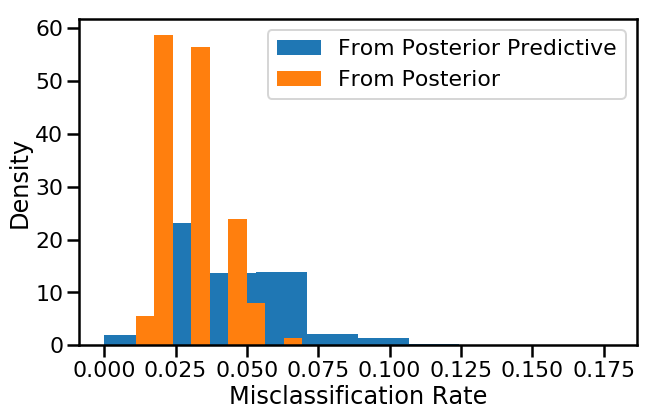

In [39]:
from_post = posterior_probs > 0.5

miss_rate_2 = []
for i in range(5000):

    data = from_post[:,i]

    miss_rate_2.append(1 - np.sum(data == np.array(y_train))/90)
    
with sns.plotting_context('poster'):
    fig, ax = plt.subplots(1,1, figsize = (10,6))
    plt.hist(miss_rates, density = True, label = 'From Posterior Predictive', alpha = 0.5)
    plt.hist(miss_rate_2, bins = 12, density = True, label = 'From Posterior', alpha = 0.5)
    plt.legend()
    plt.xlabel('Misclassification Rate')
    plt.ylabel('Density')

It appears that the posterior predictive has the wider misclassification distribution. This is likely because setting a 0.5 threshold for the posterior is less prone to variation. We also see a less continuous distribution because this setting tends to not vary among sample sets.

### 2.11. Repeat 2.9 and 2.10 for the test set (i.e. make predictions). Describe and interpret the widths of the resulting distributions.

In [40]:
x_shared_test = shared(np.array(X_test))
y_shared_test = shared(np.array(y_test))
with Model() as iris_test_model:
    
    beta = pm.Normal('beta', 0, tau = 1/100, shape = 5)
    p = pm.math.invlogit(pm.math.dot(x_shared_test, beta))
    
    y = pm.Bernoulli('y', p = p, observed = y_shared_test)
    
beta_map = pm.find_MAP(model = iris_test_model)
print(beta_map)

logp = -19.609, ||grad|| = 0.00027382: 100%|██████████| 33/33 [00:00<00:00, 2147.35it/s]  

{'beta': array([-5.38776586, -5.72900015,  8.23473365,  9.19815083, -5.97059395])}


logp = -19.609, ||grad|| = 0.00027382: 100%|██████████| 33/33 [00:00<00:00, 2332.01it/s]  
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]
Sampling 4 chains: 100%|██████████| 42000/42000 [03:21<00:00, 208.25draws/s]
The number of effective samples is smaller than 25% for some parameters.


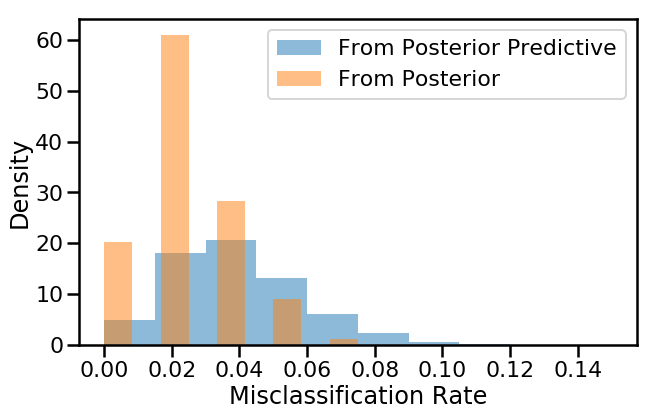

In [41]:
x_shared_test = shared(np.array(X_test))
y_shared_test = shared(np.array(y_test))
with Model() as iris_test_model:
    
    beta = pm.Normal('beta', 0, tau = 1/100, shape = 5)
    p = pm.math.invlogit(pm.math.dot(x_shared_test, beta))
    
    y = pm.Bernoulli('y', p = p, observed = y_shared_test)
    
beta_map = pm.find_MAP(model = iris_test_model)

with iris_test_model:
    step = pm.NUTS(scaling = beta_map, target_accept = 0.95)
    beta_trace_test = pm.sample(10000, step = step, start = beta_map)

beta_samples = beta_trace_test['beta'][0:10000:2]
posterior_probs = sigmoid(np.dot(X_test, beta_samples.T))

post_pred = scipy.stats.bernoulli.rvs(posterior_probs)
from_post = posterior_probs > 0.5

miss_rates_1 = []
miss_rates_2 = []

for i in range(5000):

    data_1 = post_pred[:,i]
    data_2 = from_post[:,i]

    miss_rates_1.append(1 - np.sum(data_1 == np.array(y_test))/60)
    miss_rates_2.append(1 - np.sum(data_2 == np.array(y_test))/60)
    
with sns.plotting_context('poster'):
    fig, ax = plt.subplots(1,1, figsize = (10,6))
    plt.hist(miss_rates_1, density = True, label = 'From Posterior Predictive', alpha = 0.5)
    plt.hist(miss_rates_2, bins = 12, density = True, label = 'From Posterior', alpha = 0.5)
    plt.legend()
    plt.xlabel('Misclassification Rate')
    plt.ylabel('Density')


The width of these distributions indicates that the 'from posterior' method is more likely to yield better classifications (on average). With either method, however, you're likely to get misclassificaton errors.

<div class="answer-separator">
------------------------
</div>

## Question 3 - Our Yelp Restaurant Review is in and the Fish is So Raw!

**no coding required**

In this course, we've spent a lot of time learning algorithms for performing inference on complex models. We've also spent time using these models to make decisions regarding our data. But in nearly every assignment, the model for the data is specified in the problem statement. In real life, the creative and, arguably, much more difficult task is to start with a broadly defined goal and then to customize or create a model which will meet this goal in some way. 


This homework problem is atypical in that it does not involve any programming or (necessarily) difficult mathematics/statistics. The process of answering these questions *seriously* will however give you an idea of how one might create or select a model for a particular application and your answers will help you with formalizing the model if and when you're called upon to do so.

***Grading:*** *We want you to make a genuine effort to mold an ambiguous and broad real-life question into a concrete data science or machine learning problem without the pressure of getting the "right answer". As such, we will grade your answer to this homework question on a pass/fail basis. Any reasonable answer that demonstrates actual effort will be given a full grade.*

We've compiled for you a fairly representative selection of [Yelp reviews](https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlo4e4ari3r4wd%2Fj9vjyzv62x149%2Fjoe92vh7ni6e%2Fyelp_reviews.zip for a (now closed) sushi restaurant called Ino's Sushi in San Francisco. Read the reviews and form an opinion regarding the various qualities of Ino's Sushi. Answer the following:

3.1. If the task is to summarize the quality of a restaurant in a simple and intuitive way, what might be problematic with simply classifying this restaurant as simply "good" or "bad"? Justify your answers with specific examples from the dataset.

3.2. For Ino's Sushi, categorize the food and the service, separately, as "good" or "bad" based on all the reviews in the dataset. Be as systematic as you can when you do this.

  (**Hint:** Begin by summarizing each review. For each review, summarize the reviewer's opinion on two aspects of the restaurant: food and service. That is, generate a classification ("good" or "bad") for each aspect based on what the reviewer writes.) 
  
3.3. Identify statistical weaknesses in breaking each review down into an opinion on the food and an opinion on the service. That is, identify types of reviews that make your method of summarizing the reviewer's optinion on the quality of food and service problemmatic, if not impossible. Use examples from your dataset to support your argument. 

3.4. Identify all the ways in which the task in 3.2 might be difficult for a machine to accomplish. That is, break down the classification task into simple self-contained subtasks and identify how each subtask can be accomplished by a machine (i.e. which area of machine learning, e.g. topic modeling, sentiment analysis etc, addressess this type of task).

3.5. Now let us think of a different problem, a regression problem in which our aim is to predict and do inference on what rating a given user of Yelp might give a particular restaurant. How might you estimate the across-user quality of a restaurant from data? And how might you estimate the across-restaurant curmudgeonlyness of a user?

3.6 Additionally, consider a "space of latent factors" where aspects of the user's taste interact with aspects of the restaurant. An example of such a factor might be the user's propensity to get emotional after having the perfect filet-mignon. How might you combine this information with that in 3.5 to improve your prediction and inference?

## 3.1

These reviews, as Sylvia L alluded to, are incredibly bimodal. Customers seem to rate the restaurant as either 1 or 5 stars. Obviously, this would create some issues in classifying the establishment as good or bad, neither binary label would full encompass the "true" rating. Many customers who gave a poor rating in terms of stars cited the poor service, but some still complimented the food. Take Surya G, who focused on the chef yelling but still said the liver was "tasty and succulent" and the tuna was "very good." Another reviewer, Kristen B, said "If you want high quality sushi and are willing to pay for it with absolutely horrendous service, by all means, go here. A similar sentiment seems to pervade the 5 star reviews with many reviewers, such as Youna K, saying things like "You sit, order politely, don't flag down the old lady who runs the joint, and if your water is running low, accept for what it is and enjoy your food. Based on the above, it seems a bivariate classification based on food and service is much better than a simple binary classifier.

## 3.2


| Name      | Food | Service | Stars |
|-----------|------|---------|-------|
| Surya G   | Good | Bad     | 1     |
| Karen L   | Good | Bad     | 5     |
| Tony L    | N/A  | Bad     | 1     |
| Kristen B | Good | Bad     | 1     |
| Sylvia L  | Good | Good    | 5     |
| Youna K   | Good | Bad     | 5     |
| Alison C  | Good | N/A     | 5     |
| Michael L | Good | N/A     | 5     |
| Ling C    | N/A  | Bad     | 1     |
| Maile N   | Good | Good    | 5     |

## 3.3 

One clear issue is the sparsity in the data. Assuming this is a representative sample, 40% of the samples mention only one of the two  catergories. Taking Ling C as an example, she specifically noted her review was only on the service and not the food because she was kicked out. Meanwhile, people like Michael L raved about the food -- "You come here to eat authentic Japanese sushi" -- but did not mention the service. With data this sparse, constructing a model would be virtually impossible. Morever, there was no clear correlation between number of stars given, which could be be used as a predictor, and food and service ratings. Furthermore, catergorizing service as good or bad was difficult given statements such as "...and if your water is running low, accept for what it is..." Statements such as this one by Youna K are difficult to catergorize and would make any model constructed subject to possibly misleading data.

## 3.4 

Parsing reviews into both food and service ratings is difficult for a human, let alone a computer. As mentioned above, it was a struggle to determine if statements such as  "...and if your water is running low, accept for what it is..." by Youna K read at surface level as bad, but could also be viewed as a nonfactor. Given she still rated the restaurant 5 stars, I would say it was not a factor in the rating. However, this would be virtually impossible for a computer distinguish. While basic sentiment analysis of short statements is possible, long passage analysis on two topics is almost impossible. Not only does the computer have to pick up on the genreal sentiment, it must match the sentiment of each sentence to a topic. Thus, it must first apply topic modeling to the passage. Topic modeling is difficult at best and modeling a passage that rapidly switches topic, such as this one, without keyword useage would be virtually impossible. A machine would surely struggle with this task.

## 3.5

To estimate the across-restaurant curmudgeonlyness of a user, we could take all ratings by that user and check the average. Then, comparing that average to the average of all customers across all restaurants, we could create a metric that shows how much more or less generous a given customer is with his/her rating. From this, we could assing a weight to the customer where users who have average ratings closer to the population average rating would be weighted higher as they are more indicative of the "true" rating across all customers. We can then use these weights to create a regression that uses the ratings of a restaurant scaled by the wieghts to compute an across-user rating for the restaurant.

## 3.6

To combine this with the above regression, we could include a variable for the type of food. For example, we could only weight user responses based on their typical ratings for food in a given catergory. If a user hates Japanese food but goes to a sushi restaurant for some unknown reason, we should count that response less than a user who loves Japanese food. In creating models, it is important to try to create a broadly applicable prediction, but sometimes you have to trust the user (a potential customer) can make some decisions for themselves-- this would include not going to eat at a restaurant with a cusisine they hate.

**Gratuitous Titular Reference**:  

[Sushi is not raw fish](http://www.todayifoundout.com/index.php/2011/12/sushi-is-not-raw-fish)

![](https://i.imgflip.com/pnawi.jpg)

[More Gordon Ramsey memes](https://knowyourmeme.com/memes/people/gordon-ramsay)

<div class="answer-separator">
------------------------
</div>